In [1]:
!nvidia-smi

Mon Sep 29 09:48:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xxxxxxxxxxxxxxxxxxx")  # replace xxxxxxxxxxxxxxxxx with your Roboflow API key
project = rf.workspace("xxxxxxx").project("xxxxxxxxxx")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 93.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to isro_model-1 in yolov8:: 100%|██████████| 644/644 [00:00<00:00, 8329.17it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 44.7MB/s]
New https://pypi.org/project/ultralytics/8.3.203 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/isro_model-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False,

/content


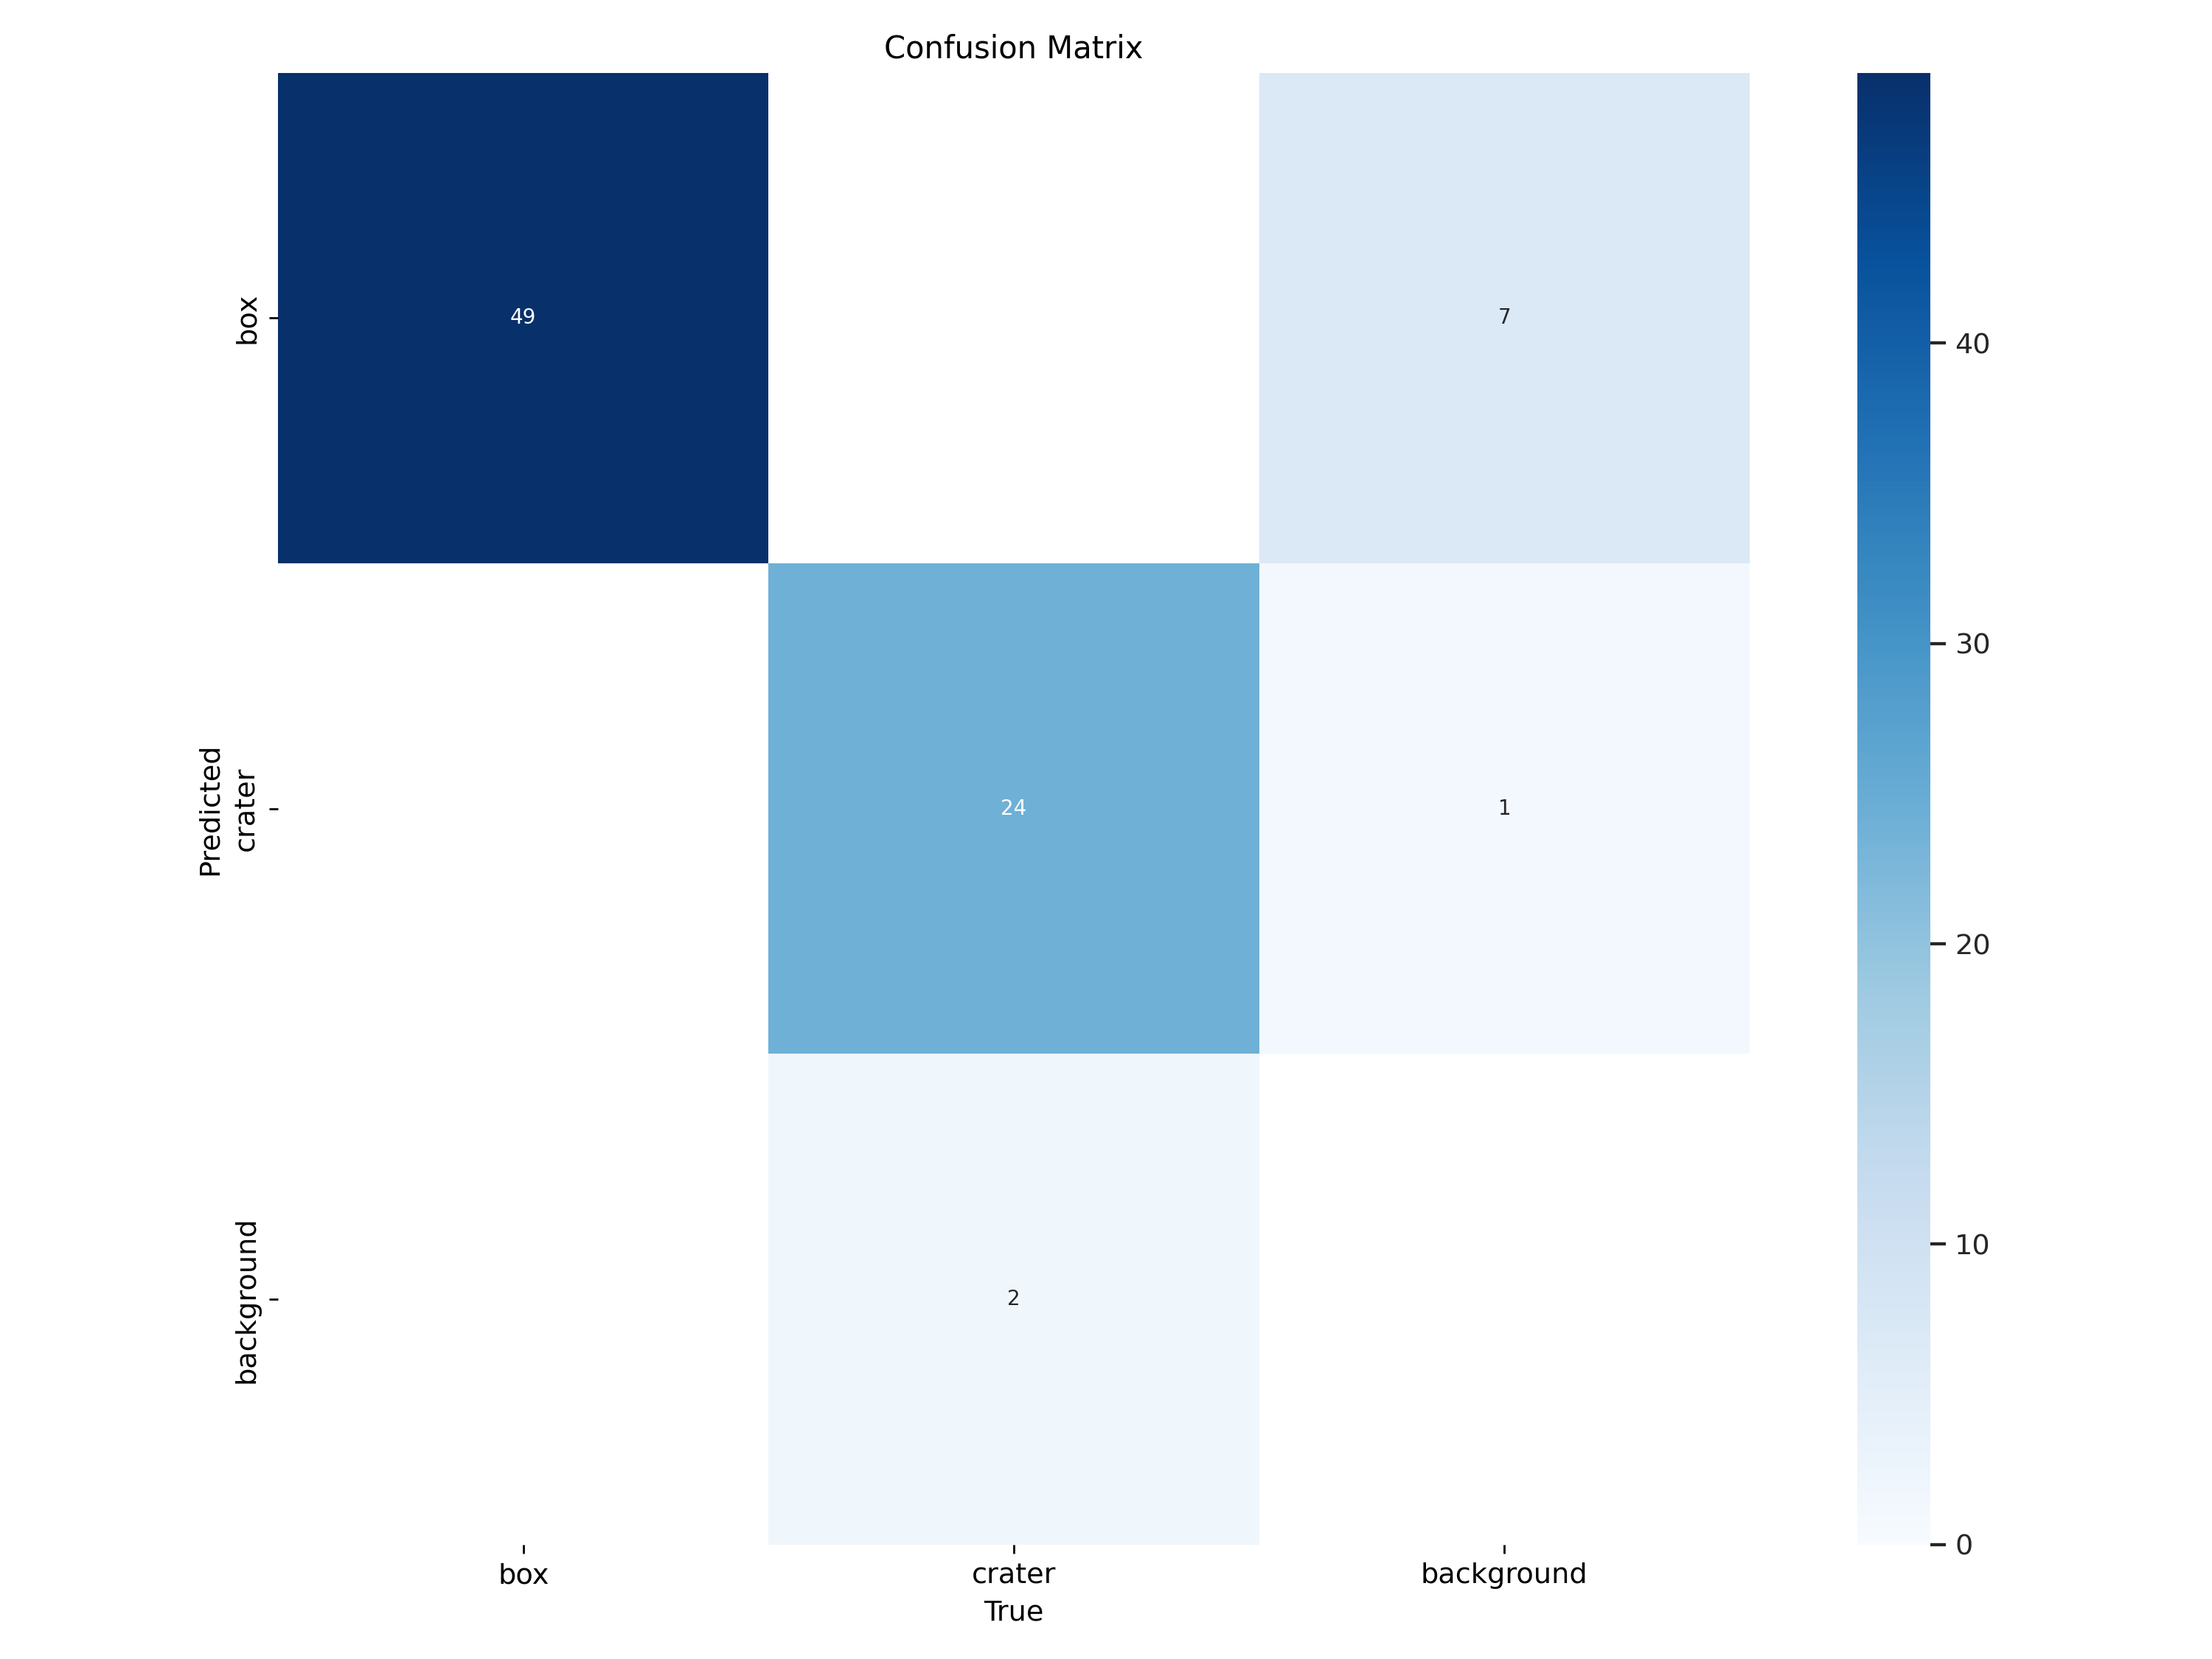

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


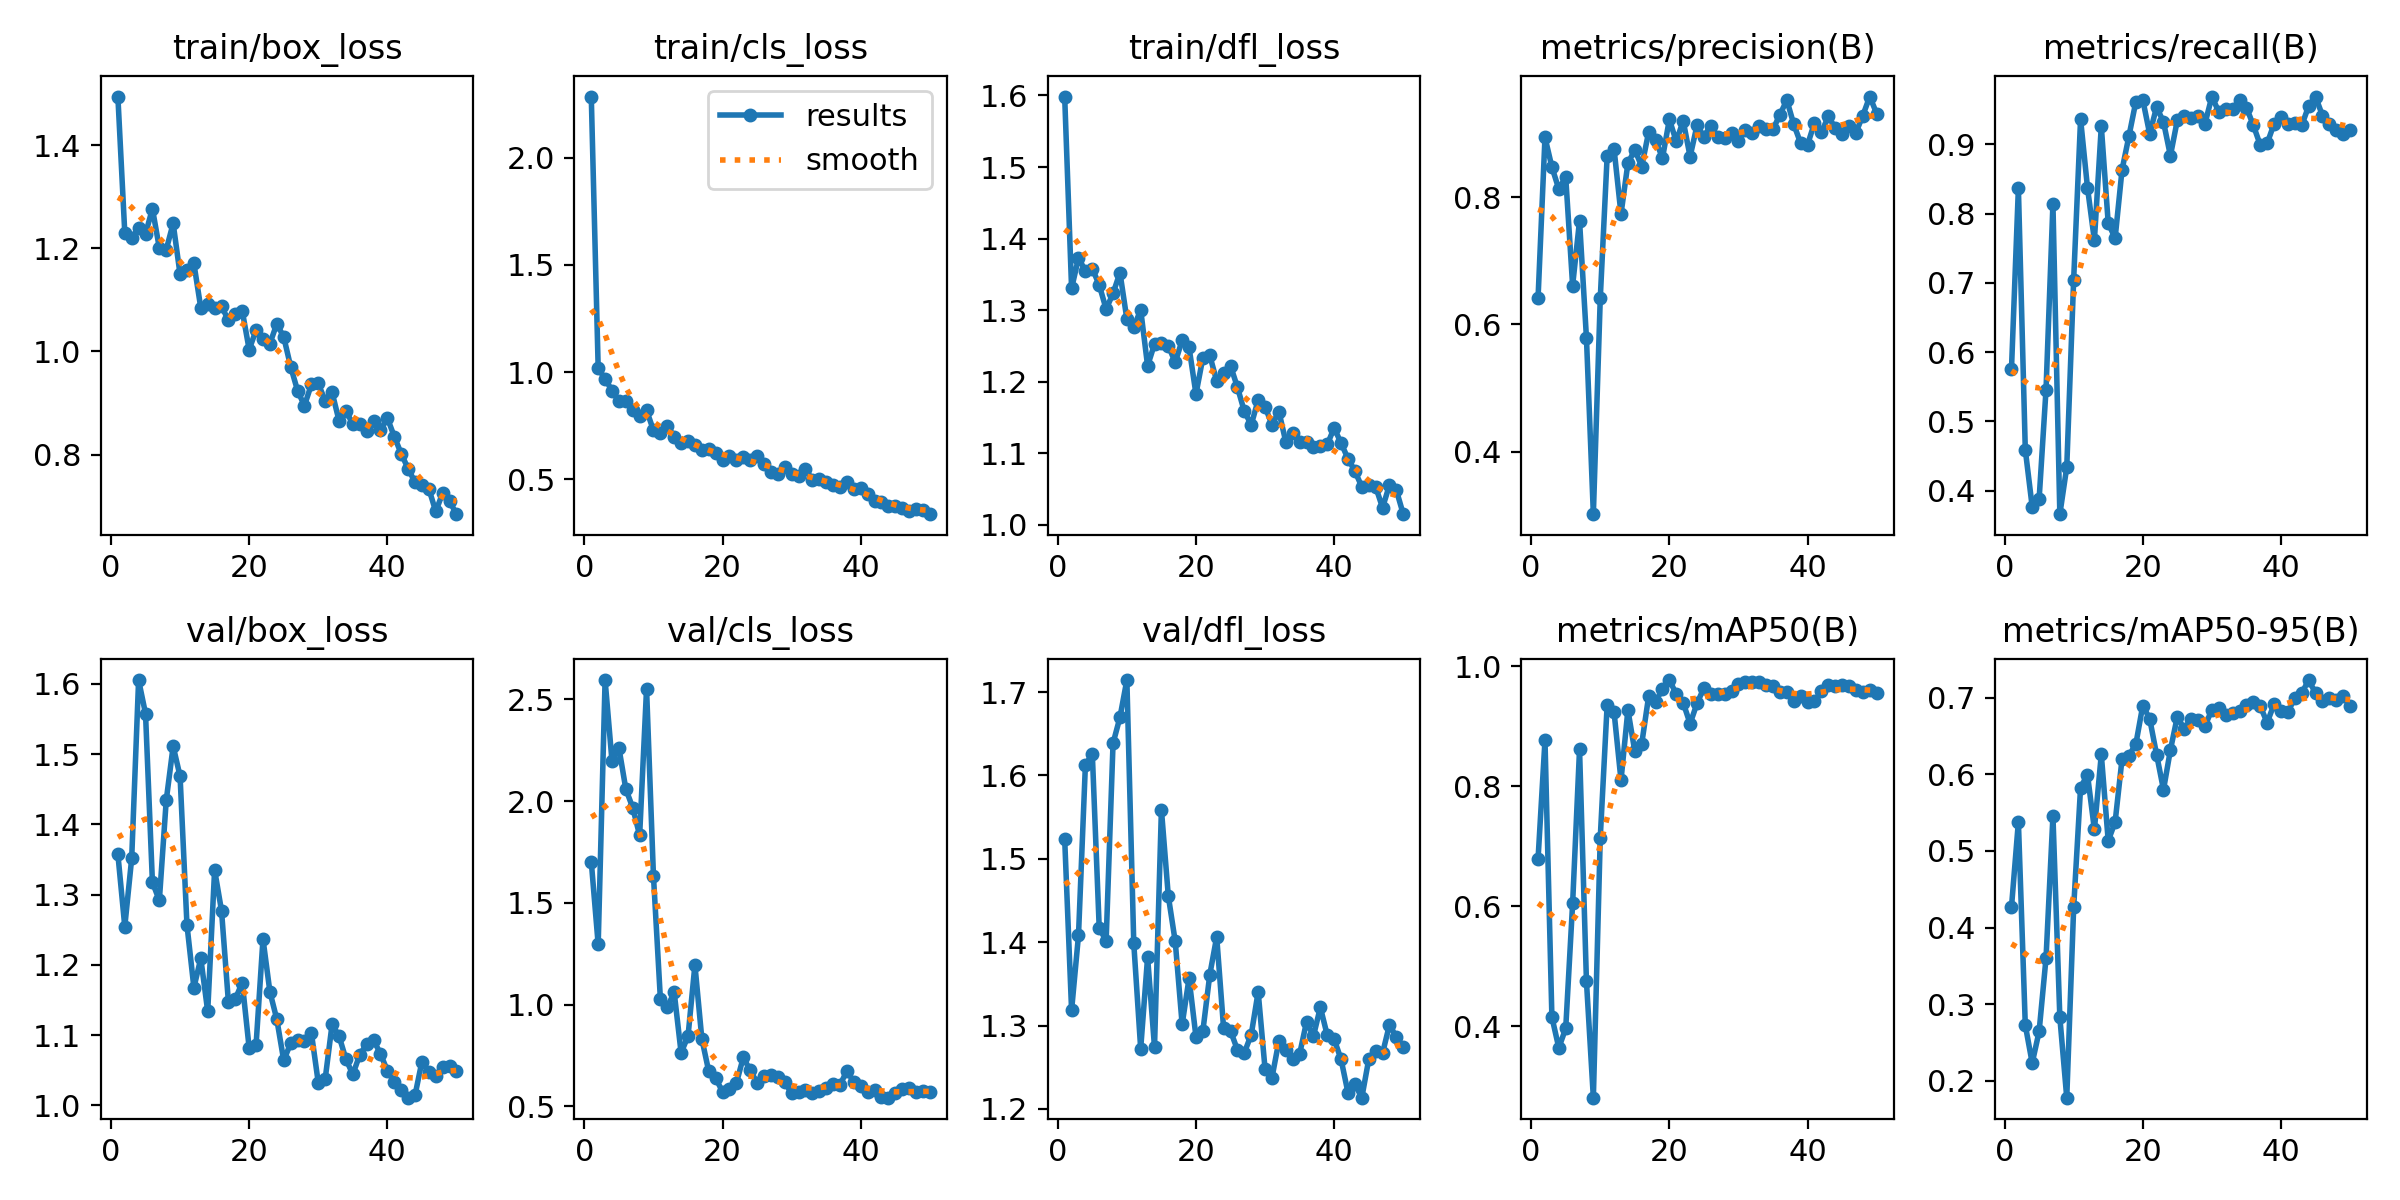

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [9]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/isro_model-1/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100% 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.61it/s]
                   all         27         75       0.91      0.955      0.968      0.723
                   box         25         49      0.874      0.987      0.974      0.779
                crater         26         26      0.946      0.923      0.962      0.666
Speed: 7.7ms preprocess, 13.6ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [10]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/13 /content/datasets/isro_model-1/test/images/IMG_9347_JPG.rf.9b5136548e612a5fca5784c65f2406e6.jpg: 640x640 3 boxs, 1 crater, 16.2ms
image 2/13 /content/datasets/isro_model-1/test/images/IMG_9354_JPG.rf.fc984ea38c233913fef09eaa6fef5657.jpg: 640x640 2 boxs, 1 crater, 16.2ms
image 3/13 /content/datasets/isro_model-1/test/images/IMG_9363_JPG.rf.918793667101e46cd046abe072d40683.jpg: 640x640 2 boxs, 1 crater, 16.2ms
image 4/13 /content/datasets/isro_model-1/test/images/IMG_9385_JPG.rf.bf0837da78a9e9cb055ada35e7e6b731.jpg: 640x640 2 boxs, 1 crater, 16.2ms
image 5/13 /content/datasets/isro_model-1/test/images/IMG_9392_JPG.rf.1ea19e1f3ad39e526813f0a2dfd19d3c.jpg: 640x640 2 boxs, 1 crater, 16.2ms
image 6/13 /content/datasets/isro_model-1/test/images/IMG_9393_JPG.rf.55e083c721c57aed0c4771baa2e4b48a.jpg: 640x64

In [11]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/isro-r6oka/isro_model/1
Share your model with the world at: https://universe.roboflow.com/isro-r6oka/isro_model/model/1


In [12]:
%cd /content

!zip -r content.zip *

from google.colab import files
files.download("content.zip")


/content
  adding: datasets/ (stored 0%)
  adding: datasets/isro_model-1/ (stored 0%)
  adding: datasets/isro_model-1/data.yaml (deflated 34%)
  adding: datasets/isro_model-1/README.roboflow.txt (deflated 47%)
  adding: datasets/isro_model-1/train/ (stored 0%)
  adding: datasets/isro_model-1/train/labels/ (stored 0%)
  adding: datasets/isro_model-1/train/labels/IMG_9418_JPG.rf.2dcabcfbe1c516a81a109c69520899f1.txt (deflated 44%)
  adding: datasets/isro_model-1/train/labels/IMG_9451_JPG.rf.fa6a7a4a2c4ddafd5a5c1181103121e3.txt (deflated 50%)
  adding: datasets/isro_model-1/train/labels/IMG_9442_JPG.rf.f418b51c2d8bb39a252eeee62c6219a2.txt (deflated 52%)
  adding: datasets/isro_model-1/train/labels/IMG_9414_JPG.rf.c1941ac5b0faaeb70992ac8309d4130f.txt (deflated 45%)
  adding: datasets/isro_model-1/train/labels/IMG_9451_JPG.rf.558086037a7914eba2fa9600e7b96429.txt (deflated 51%)
  adding: datasets/isro_model-1/train/labels/IMG_9356_JPG.rf.7bd5d07cf2f171045cb98ff4049d5d90.txt (deflated 51%)
  a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>